In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as m
import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz
from astroquery.jplhorizons import Horizons


C:\Users\micha\AppData\Roaming\Python\Python310\site-packages\requests\__init__.py:102: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({})/charset_normalizer ({}) doesn't match a supported "


### Conversion between the apperent postion of celestial objects form earth expressed as azimuth and elevation to the universal frame of refrence of RA and Dec

### First I need to know how to specify the celestial object in question

In [ ]:
# Up in the sky: specifying and converting coordinates 

c = SkyCoord(ra=10.625*u.degree, dec=41.2*u.degree, frame='icrs')
c = SkyCoord(10.625, 41.2, frame='icrs', unit='deg')
c = SkyCoord('00h42m30s', '+41d12m00s', frame='icrs')
c = SkyCoord('00h42.5m', '+41d12m')
c = SkyCoord('00 42 30 +41 12 00', unit=(u.hourangle, u.deg))
c = SkyCoord('00:42.5 +41:12', unit=(u.hourangle, u.deg))

print(c.ra.hour)
print(c.ra.hms )
print(c.dec.radian)
print(c.dec.degree)
print(c.to_string('hmsdms'))
print(c.to_string('decimal'))

print(c)
print(c.galactic)
print(c.transform_to('fk5'))

print(c.cartesian.x )

c = SkyCoord(x=1, y=2, z=3, unit='kpc', representation_type='cartesian')
c.representation_type = 'cylindrical'



### separation of two stars:

c1 = SkyCoord(ra=10*u.degree, dec=9*u.degree, distance=10*u.pc, frame='icrs')
c2_dist = SkyCoord(ra=11*u.degree, dec=10*u.degree, distance=11.5*u.pc, frame='icrs')
c2_nodis = SkyCoord(ra=11*u.degree, dec=10*u.degree, frame='fk5')
print(c1.separation_3d(c2_dist)  )
print(c1.separation(c2_nodis) )


# star names 
SkyCoord.from_name("PSR J1012+5307") 
SkyCoord.from_name("CRTS SSS100805 J194428-420209", parse=True)  

### Then, time and place on earth

In [24]:
## back down on earth use site name, address or coordinates

EarthLocation.of_site('Apache Point Observatory')  ## all names are here EarthLocation.get_site_names() 
EarthLocation.of_address('1002 Holy Grail Court, St. Louis, MO')
EarthLocation.of_address('Danbury, CT')

loc = EarthLocation.of_address('Tucson, AZ')
from timezonefinder import TimezoneFinder
tz_name = TimezoneFinder().timezone_at(lng=loc.lon.degree,lat=loc.lat.degree)



<EarthLocation (-1463969.30185172, -5166673.34223433, 3434985.71204565) m>

### Then do the transformation from RA and DEG to AZ and EL

In [ ]:
# link Up and Down:  convert ra dec to az al for m33

m33 = SkyCoord.from_name('M33')
bear_mountain = EarthLocation(lat=41.3*u.deg, lon=-74*u.deg, height=390*u.m)
utcoffset = -4*u.hour  # Eastern Daylight Time
time = Time('2012-7-12 23:00:00') - utcoffset
m33altaz = m33.transform_to(AltAz(obstime=time,location=bear_mountain))
print(f"M33's Altitude = {m33altaz.alt:.2}")

#### Another 2 examples for Jupiter and a list of bright stars 

In [ ]:
# apply the conversiton to jupiter 

mylocation_dicto = {}
mylocation_dicto["lat"], mylocation_dicto["lon"] ,mylocation_dicto["elevation"]= 41.2579028 , -74.73456666666667 , 0.34702294557097116
my_stargazing_trip = EarthLocation(lat=41.2579028*u.deg, lon=-74.73456666666667*u.deg, height=347.02294557097116 *u.m)



jupiter = Horizons(id=599, location=mylocation_dicto, epochs = {'start': '2022-09-27 3:00 ', 'stop': '2022-09-27 3:01 ', 'step': "1m"}).ephemerides() # 23:00 newyork is 03:00 am utc

#print(jupiter["RA"][0])     check against data from jet propulsion lab
#print(jupiter["DEC"][0])   
#print(jupiter["AZ"][0])   
#print(jupiter["EL"][0])   

jupiter_cor = SkyCoord(jupiter["RA"][0],jupiter["DEC"][0], frame='icrs', unit='deg')
altaz = jupiter_cor.transform_to(AltAz(obstime=time,location=my_stargazing_trip))
print(f"jupiter Altitude = {altaz.alt} and Azimuth = {altaz.az} in constellation {jupiter_cor.get_constellation()}")


# apply the conversion to other bright stars for tonight 

my_stargazing_trip = EarthLocation(lat=41.2579028*u.deg, lon=-74.73456666666667*u.deg, height=347.02294557097116 *u.m)
utcoffset = -4*u.hour  # Eastern Daylight Time
time = Time('2022-09-30 23:00:00') - utcoffset

starlist = ["Sirius", "Rigel","Arcturus","Betelgeuse","Vega","Alpha Centauri","Procyon","Canopus","Capella"]
for star in starlist:
    mystar = SkyCoord.from_name(star)
    altaz = mystar.transform_to(AltAz(obstime=time,location=my_stargazing_trip))
    if altaz.alt> 0:
        print(star,f" Altitude = {altaz.alt} and Azimuth = {altaz.az} in constellation {mystar.get_constellation()}")





### More about getting other postion info and conversions for a specific star  

In [78]:
vega = SkyCoord.from_name("Vega")
print(vega.cartesian)
print(vega.data)
print(vega.cylindrical)
print((vega.ra.hourangle))
vega.ra , vega.dec

(0.12509646, -0.76941313, 0.62638192) 
(279.23473479, 38.78368896) deg
(0.77951632, -80.76526521, 0.62638192) (, deg, )


(<Longitude 279.23473479 deg>, <Latitude 38.78368896 deg>)

### Now since we can get the Az and El we can graph it for Jupiter and Mars along with the sun and the moon

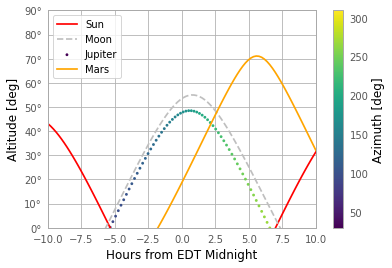

In [113]:
from astropy.coordinates import get_sun
from astropy.coordinates import get_moon


# when and where
my_stargazing_trip = EarthLocation(lat=41.2579028*u.deg, lon=-74.73456666666667*u.deg, height=347.02294557097116 *u.m)
midnight = Time('2012-09-30 00:00:00') +  4*u.hour
range_of_hours = 10
delta_midnight = np.linspace(-range_of_hours, range_of_hours, 100)*u.hour



# what? 
jupiter = Horizons(id=599, location=mylocation_dicto, epochs = {'start': '2022-09-30 4:00 ', 'stop': '2022-09-30 4:01 ', 'step': "1m"}).ephemerides()
jupiter_cor = SkyCoord(jupiter["RA"][0],jupiter["DEC"][0], frame='icrs', unit='deg')
jupiteraltazs= jupiter_cor.transform_to(AltAz(obstime=midnight+delta_midnight,location=my_stargazing_trip))
Mars = Horizons(id=499, location=mylocation_dicto, epochs = {'start': '2022-09-30 4:00 ', 'stop': '2022-09-30 4:01 ', 'step': "1m"}).ephemerides() 
Mars_cor = SkyCoord(Mars["RA"][0],Mars["DEC"][0], frame='icrs', unit='deg')
Marsaltazs= Mars_cor.transform_to(AltAz(obstime=midnight+delta_midnight,location=my_stargazing_trip))



# what eles
sunaltazs= get_sun(midnight+delta_midnight).transform_to(AltAz(obstime=midnight + delta_midnight, location=my_stargazing_trip))
moonaltazs = get_moon(midnight+delta_midnight).transform_to(AltAz(obstime=midnight + delta_midnight, location=my_stargazing_trip))


# draw 
plt.plot(delta_midnight, sunaltazs.alt, color='r', label='Sun')
plt.plot(delta_midnight, moonaltazs.alt, color=[0.75]*3, ls='--', label='Moon')
plt.scatter(delta_midnight, jupiteraltazs.alt, c=jupiteraltazs.az, label='Jupiter', lw=0, s=8, cmap='viridis') #or:  # plt.plot(delta_midnight, jupiteraltazs.alt) or #plt.plot(delta_midnight, jupiteraltazs.secz)
plt.plot(delta_midnight, Marsaltazs.alt, color='orange', label='Mars')



plt.xlim(-range_of_hours, range_of_hours)  ## how many hours before and after midnight should be drawn
plt.ylim(0*u.deg, 90*u.deg)
plt.xlabel('Hours from EDT Midnight')
plt.ylabel('Altitude [deg]')
plt.colorbar().set_label('Azimuth [deg]')
plt.legend(loc='upper left')

plt.show()

### it is clear that Jupiter and Sun were in oppositon at that day 
# (jupiter started getting up when the sun went down)


### Also, we can calculate the distence between Mars and Jupiter

In [128]:
### how far away is the stars 

jupiter = Horizons(id=599, location=mylocation_dicto, epochs = {'start': '2022-09-30 4:00 ', 'stop': '2022-09-30 4:01 ', 'step': "1m"}).ephemerides() 
Mars = Horizons(id=499, location=mylocation_dicto, epochs = {'start': '2022-09-30 4:00 ', 'stop': '2022-09-30 4:01 ', 'step': "1m"}).ephemerides() 

jupiter_dist = Horizons(id=599, location="@399", epochs = {'start': '2022-09-30 4:00 ', 'stop': '2022-09-30 4:01 ', 'step': "1m"}).vectors()["range"][0] ## JPL units is in AU
mars_dist = Horizons(id=499, location="@399", epochs = {'start': '2022-09-30 4:00 ', 'stop': '2022-09-30 4:01 ', 'step': "1m"}).vectors()["range"][0]

jupiter_cor = SkyCoord(jupiter["RA"][0],jupiter["DEC"][0], distance=jupiter_dist ,frame='icrs',  unit=(u.deg, u.deg,u.au))
Mars_cor = SkyCoord(Mars["RA"][0],Mars["DEC"][0], distance=mars_dist , frame='icrs', unit=(u.deg, u.deg,u.au))

print(jupiter_cor.separation_3d(Mars_cor))  # I got 3.8486909454033094 AU which is exactly as: 


jup_vec = Horizons(id=599, location="@10", epochs = {'start': '2022-09-30 4:00 ', 'stop': '2022-09-30 4:01 ', 'step': "1m"}).vectors()
mars_vec = Horizons(id=499, location="@10", epochs = {'start': '2022-09-30 4:00 ', 'stop': '2022-09-30 4:01 ', 'step': "1m"}).vectors()

x1_coords, y1_coords, z1_coords = jup_vec["x"][0], jup_vec["y"][0], jup_vec["z"][0]
x2_coords, y2_coords, z2_coords =  mars_vec["x"][0], mars_vec["y"][0], mars_vec["z"][0] 

p1 = np.array([x1_coords, y1_coords, z1_coords])
p2 = np.array([x2_coords, y2_coords, z2_coords])

squared_dist = np.sum((p1-p2)**2, axis=0)
dist = np.sqrt(squared_dist)
print(dist)


3.8486909454033094 AU


### Trying to visualize the 23 degree that the earth axis is tilted by (online: Earth's axial tilt actually oscillates between 22.1 and 24.5 degrees.) 
### also called the angle between celestial equator and ecliptic 

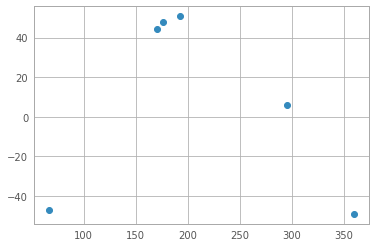

In [21]:
planets_id = [10, 199, 299, 499, 599, 699]

mylocation_dicto = {}
mylocation_dicto["lat"], mylocation_dicto["lon"] ,mylocation_dicto["elevation"]= 41.2579028 , -74.73456666666667 , 0.34702294557097116


lst1 = []
lst2 = []


for id in planets_id:
    a = Horizons(id=id, location=mylocation_dicto).ephemerides()["AZ"]
    lst1.append(a)
    b = Horizons(id=id, location=mylocation_dicto).ephemerides()["EL"]
    lst2.append(b)

fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(lst1, lst2)
plt.show()

# This is a 2d projection of the celestial sphere, the angle is not very clear to me unless I imagine  curving the flat paper into a ball 
## I tried to look online for ways to figure out the curvature the surface that would allow that to be a straight line, but I failed

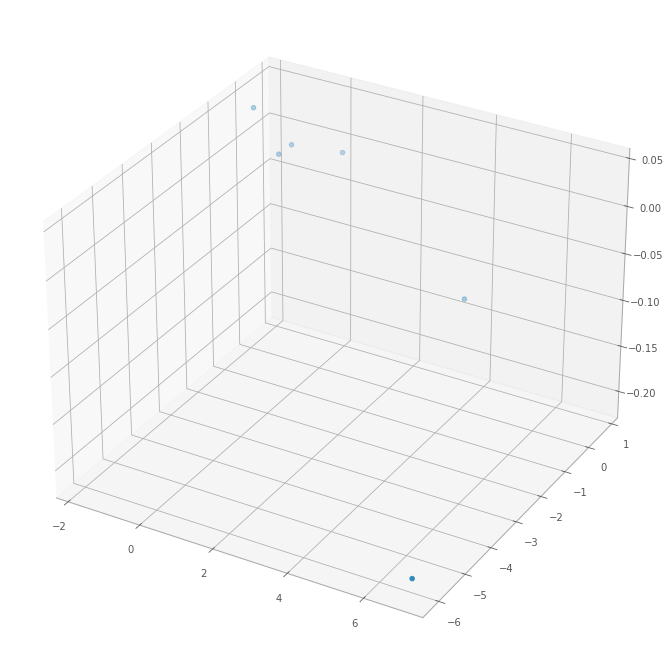

In [29]:
planets_id = [10, 199, 299, 499, 599, 699]

fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals = [], [] , []

for id in planets_id:
    a = Horizons(id=id, location="@399").vectors()["x"]
    sequence_containing_x_vals.append(a)
    b = Horizons(id=id,  location="@399").vectors()["y"]
    sequence_containing_y_vals.append(b)
    c = Horizons(id=id, location="@399").vectors()["z"]
    sequence_containing_z_vals.append(c)

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
plt.show()

# that didn't work either

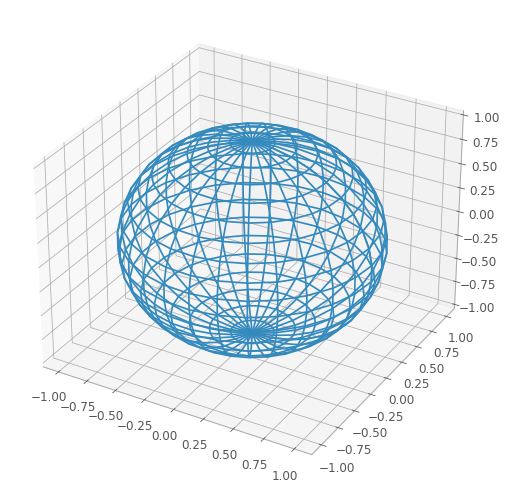

In [4]:
# create a sphere
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = [7.00, 7]
plt.rcParams["figure.autolayout"] = True
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
#r = 0.05
u, v = np.mgrid[0:2 * np.pi:30j, 0:np.pi:20j]
x = np.cos(u) * np.sin(v)
y = np.sin(u) * np.sin(v)
z = np.cos(v)
#ax.plot_surface(x, y, z, cmap=plt.cm.YlGnBu_r)
ax.plot_wireframe(x, y, z, cmap=plt.cm.YlGnBu_r)

plt.show()


C:\Users\mains\AppData\Local\Temp\ipykernel_13848\2096777320.py:6: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


0.10200419132929198 0.9760321220874312 -0.19224058261658233
-0.06959223115445454 0.9975711748463223 0.002944907243558406
-0.23902226451516176 0.951096838814045 0.19566082966187798
-0.3947485957699742 0.839778062855074 0.37275508217194436
-0.5261681283153379 0.6712051473233719 0.5221405471247611
-0.6243349603077727 0.45687246590027114 0.633619292035602
-0.6825706548417513 0.21139471501123494 0.6995781411781115
-0.6969197011079339 -0.04848970066728763 0.7155079867736104
-0.6664193464169409 -0.3050602742581646 0.6803113138782498
-0.5931651808366207 -0.5408229870845762 0.5963770324920094
-0.48216809777889685 -0.7397035169936927 0.46941733290478505
-0.34101229525612026 -0.8881433332694781 0.3080779674905904
-0.17933795185682538 -0.9760241249132611 0.12334831418021809


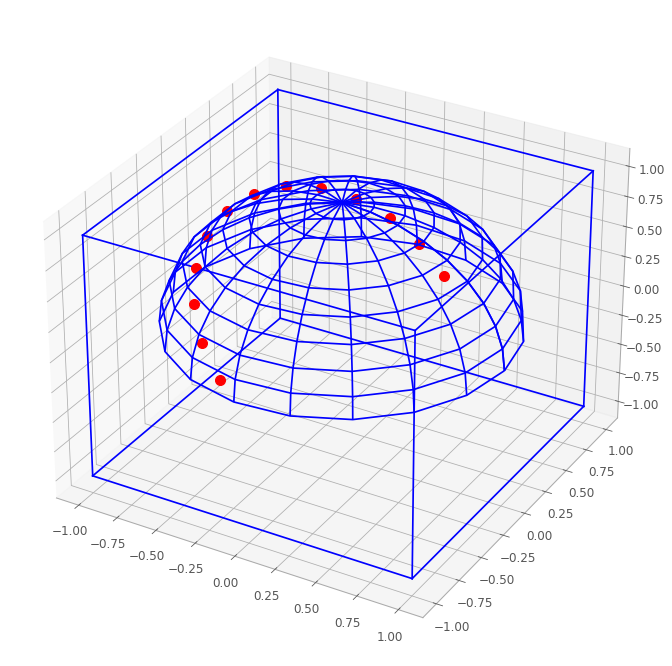

In [92]:
import matplotlib.pyplot as plt
import numpy as np
from itertools import product, combinations
fig = plt.figure(figsize=(12, 12))
ax = fig.gca(projection='3d')
r = [-1, 1]
for s, e in combinations(np.array(list(product(r, r, r))), 2):
        if np.sum(np.abs(s-e)) == r[1]-r[0]:
                    ax.plot3D(*zip(s, e), color="b", zorder= 10)
                    
# draw sphere
u, v = np.mgrid[0:360:20j, 0:90:10j]
u   = u* np.pi / 180
v     = v* np.pi / 180 
x = np.cos(u)*np.sin(v)
y = np.sin(u)*np.sin(v)
z = np.cos(v)
ax.plot_wireframe(x, y, z, color="blue",  zorder=-50)
#ax.plot_surface(x, y, z, cmap=plt.cm.YlGnBu_r, zorder=0)

def elaz_to_xyz(el,az, colorr):
    el   = (90 - el)* np.pi/180 # to radian
    az     = az* np.pi/180
    x = np.sin( el ) * np.cos( az )
    y = np.sin( el ) * np.sin( az )
    z = np.cos( el )
    ax.scatter(x, y, z,color=colorr, s=100, zorder=10)



planets_id = [10, 199, 299, 499, 599, 699, 799, 899]
planets_id = [10]  # just the sun
mylocation_dicto = {}
mylocation_dicto["lat"], mylocation_dicto["lon"] ,mylocation_dicto["elevation"]= 41.2579028 , -74.73456666666667 , 0.34702294557097116

for P_id in planets_id:
    postions = Horizons(id=P_id, location=mylocation_dicto ,epochs = {'start': '2022-09-30 10:00 ', 'stop': '2022-09-30 22:00 ', 'step': "1h"}).ephemerides()  # from 6 am to 6 pm utc + 4)
    for i in postions:
        elaz_to_xyz(i["EL"] , i["AZ"] , "red")
        


plt.show()

# that's starting to get somewhere but needs a lot of work